In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv("feature_code.csv", index_col=0)

In [3]:
for r in df.index:
    nums = list()
    end = False
    for i, c in enumerate(df.columns):
        if pd.isnull(df.loc[r,c]):
            end = True
        elif end:
            print('Error: data after end, [{},{}]'.format(r, c))
        elif i%2!=0:
            n = int(df.loc[r,c])
            if not nums:
                nums.append(n)
            elif n == nums[-1] + 1:
                nums.append(n)
            else:
                print('Error: num wrong, [{},{}]'.format(r, c))
print('checked feature code')

checked feature code


In [4]:
feature_code = dict()
for r in df.index:
    feature_code[r] = dict()
    for i, c in enumerate(df.columns):
        if pd.isnull(df.loc[r,c]):
            break
        elif i%2 == 0:
            k = df.loc[r,c]
        else:
            feature_code[r][k] = int(df.loc[r,c])
print(feature_code)

{'萼片数': {}, '萼片颜色': {'绿': 1, '紫红': 2}, '萼片茸毛': {'无': 0, '有': 1}, '完全开放花冠大小1': {}, '完全开放花冠大小2': {}, '花瓣数': {}, '花瓣颜色': {'白': 1, '微绿': 2, '淡红': 3}, '花瓣茸毛': {'无': 0, '有': 1}, '最大花瓣质地': {'薄': 1, '中': 2, '厚': 3}, '子房茸毛': {'无': 0, '有': 1}, '花柱长度': {}, '花柱头开裂数': {}, '柱头裂位': {'浅': 1, '中': 2, '深': 3, '全': 4}, '雌雄蕊相对高度': {'雌低': 1, '等高': 2, '雌高': 3}, '有无花香': {'无': 0, '有': 1}, '果实形状': {'球': 1, '肾': 2, '三角': 3, '四角': 4, '梅花': 5}, '果实大小1（mm）': {}, '果实大小2（mm）': {}, '果皮中部边缘厚度': {}, '种子形状': {'球': 1, '半球': 2, '锥': 3, '似肾': 4, '不规则': 5}, '种子大小1(mm)': {}, '种子大小2(mm)': {}, '百粒重（g）': {}, '种皮颜色': {'棕色': 1, '棕褐色': 2, '褐色': 3}, '叶长cm': {}, '叶宽cm': {}, '叶面积（cm2）': {}, '叶片大小': {'小': 1, '中': 2, '大': 3, '特大': 4}, '叶脉对数': {}, '叶正面颜色': {'黄绿': 1, '淡绿': 2, '绿': 3, '深绿': 4}, '叶正面隆起性': {'平': 1, '稍隆起': 2, '隆起': 3, '强隆起': 4}, '叶形': {'近圆': 1, '卵形': 2, '椭圆': 3, '长椭圆': 4, '披针形': 5}, '叶身形态': {'稍内折': 1, '内折': 2, '平': 3, '稍背卷': 4}, '叶片质地': {'柔软': 1, '中': 2, '硬': 3}, '叶背茸毛': {'无': 0, '有': 1}, '叶齿密度': {'稀': 1, '中': 2, '密': 3}, '叶

In [5]:
def to_num(df):
    for r in df.index:
        if not feature_code[r]:
            df.loc[r] = pd.to_numeric(df.loc[r])
        else:
            print(r, feature_code[r])
            df.loc[r] = df.loc[r].apply(lambda x: x if pd.isnull(x) else feature_code[r][x.strip()])
    return df

In [6]:
jiukeng = pd.read_csv("tea-jiukeng.csv", index_col=0)
tiantai = pd.read_csv("tea-tiantai.csv", index_col=0)
shangyu = pd.read_csv("tea-shangyu.csv", index_col=0)
muhe = pd.read_csv("tea-muhe.csv", index_col=0)

In [7]:
jiukeng = pd.concat([jiukeng.iloc[:,0:10], jiukeng.iloc[:,30:40], jiukeng.iloc[:,60:70]], axis=1)
tiantai = pd.concat([tiantai.iloc[:,0:10], tiantai.iloc[:,30:40]], axis=1)
shangyu = pd.concat([shangyu.iloc[:,0:10], shangyu.iloc[:,30:40]], axis=1)
muhe = pd.concat([muhe.iloc[:,0:10], muhe.iloc[:,30:40], muhe.iloc[:,60:70], muhe.iloc[:,90:100]], axis=1)

In [8]:
merged = pd.concat([jiukeng, tiantai, shangyu, muhe], axis=1)
merged = to_num(merged)

萼片颜色 {'绿': 1, '紫红': 2}
萼片茸毛 {'无': 0, '有': 1}
花瓣颜色 {'白': 1, '微绿': 2, '淡红': 3}
花瓣茸毛 {'无': 0, '有': 1}
最大花瓣质地 {'薄': 1, '中': 2, '厚': 3}
子房茸毛 {'无': 0, '有': 1}
柱头裂位 {'浅': 1, '中': 2, '深': 3, '全': 4}
雌雄蕊相对高度 {'雌低': 1, '等高': 2, '雌高': 3}
有无花香 {'无': 0, '有': 1}
果实形状 {'球': 1, '肾': 2, '三角': 3, '四角': 4, '梅花': 5}
种子形状 {'球': 1, '半球': 2, '锥': 3, '似肾': 4, '不规则': 5}
种皮颜色 {'棕色': 1, '棕褐色': 2, '褐色': 3}
叶片大小 {'小': 1, '中': 2, '大': 3, '特大': 4}
叶正面颜色 {'黄绿': 1, '淡绿': 2, '绿': 3, '深绿': 4}
叶正面隆起性 {'平': 1, '稍隆起': 2, '隆起': 3, '强隆起': 4}
叶形 {'近圆': 1, '卵形': 2, '椭圆': 3, '长椭圆': 4, '披针形': 5}
叶身形态 {'稍内折': 1, '内折': 2, '平': 3, '稍背卷': 4}
叶片质地 {'柔软': 1, '中': 2, '硬': 3}
叶背茸毛 {'无': 0, '有': 1}
叶齿密度 {'稀': 1, '中': 2, '密': 3}
叶齿深度 {'浅': 1, '中': 2, '深': 3}
叶基形态 {'楔形': 1, '近圆形': 2}
叶尖形态 {'急尖': 1, '渐尖': 2, '钝尖': 3, '圆尖': 4}
叶缘形态 {'平': 1, '微波': 2, '波': 3}
着生状态 {'上斜': 1, '稍上斜': 2, '水平': 3, '下垂': 4}
树型 {'灌木': 1, '小乔木': 2, '乔木': 3}
树姿 {'直立': 1, '半开张': 2, '开张': 3}
1芽2叶芽叶颜色 {'玉白': 1, '黄绿': 2, '淡绿': 3, '绿': 4, '紫绿': 5}
1芽2叶芽叶茸毛 {'无': 0, '少': 1, 

In [9]:
merged.loc['完全开放花冠大小1'] = (merged.loc['完全开放花冠大小1'] + merged.loc['完全开放花冠大小2'])/2
merged = merged.rename({'完全开放花冠大小1':'完全开放花冠大小'})
merged = merged.drop(index=['完全开放花冠大小2'])

In [10]:
keys = ['萼片数','完全开放花冠大小','花瓣数','最大花瓣质地','花柱长度','柱头裂位','雌雄蕊相对高度','着生状态','叶长cm','叶宽cm','叶正面颜色','叶正面隆起性','叶形','叶身形态','叶基形态','叶缘形态']
removed_keys = set(merged.index) - set(keys)
merged = merged.drop(removed_keys)

In [11]:
merged

,QT1-1,QT1-2,QT1-3,QT1-4,QT1-5,QT1-6,QT1-7,QT1-8,QT1-9,QT1-10,...,91,92,93,94,95,96,97,98,99,100
萼片数,5,5,5,5,5,5,5,4,5,5,...,5,5,5,5,5,5,5,5,5,5
完全开放花冠大小,3.2,3,3.15,2.9,3.3,3.95,3.05,2.95,3.05,3.05,...,3.1,3.7,3.7,3.15,3.3,3.35,3.3,3.35,3.4,3.45
花瓣数,7,6,7,6,7,6,8,7,7,7,...,6,8,5,8,6,7,7,8,7,5
最大花瓣质地,2,2,2,2,2,3,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
花柱长度,1.2,1,1,0.9,1.1,1.4,1,1.1,1,1,...,1.7,0.8,1.6,1.6,1.2,1.6,1.5,1.5,1.4,1.2
柱头裂位,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
雌雄蕊相对高度,2,2,2,2,3,3,2,3,2,2,...,3,2,3,2,2,3,3,3,3,3
叶长cm,9.5,11.1,9.6,11.3,9.5,8.6,7.9,9.2,8.2,9.2,...,9.4,8.9,8.4,7.9,8.3,9.4,8.4,7,7.2,7
叶宽cm,4.2,5.4,4.2,3.4,3.1,2.8,2.8,3.3,2.7,3.1,...,3.2,3.2,3.1,2.6,2.9,3,3,2.4,2.7,2.6
叶正面颜色,1,3,3,3,3,3,3,3,3,3,...,3,3,1,3,1,3,3,3,3,3


## Correlation

In [12]:
def crowd(df):
    short_rows = list()
    for r in df.index:
        l = list()
        for c in df.columns:
            if not pd.isnull(df.loc[r,c]):
                l.append(df.loc[r,c])
        if len(l) < 110:
            short_rows.append(r)
        l.extend([np.nan for _ in range(df.shape[1]-len(l))])
        df.loc[r] = l
    return df, short_rows

In [13]:
df, short_rows = crowd(merged)
df = df.drop(short_rows)
print('drop', short_rows)
df = df.dropna(axis=1)
df = df.T

drop []


In [14]:
drop_cols = list()
for c in df.columns:
    if df[c].std() == 0:
        drop_cols.append(c)
print('drop', drop_cols)
df = df.drop(drop_cols, axis=1)
df

drop []


,萼片数,完全开放花冠大小,花瓣数,最大花瓣质地,花柱长度,柱头裂位,雌雄蕊相对高度,叶长cm,叶宽cm,叶正面颜色,叶正面隆起性,叶形,叶身形态,叶基形态,叶缘形态,着生状态
QT1-1,5,3.2,7,2,1.2,1,2,9.5,4.2,1,3,3,3,2,2,2
QT1-2,5,3,6,2,1,1,2,11.1,5.4,3,2,3,3,1,1,2
QT1-3,5,3.15,7,2,1,1,2,9.6,4.2,3,3,3,1,1,1,1
QT1-4,5,2.9,6,2,0.9,1,2,11.3,3.4,3,2,5,1,1,1,1
QT1-5,5,3.3,7,2,1.1,1,3,9.5,3.1,3,1,5,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5,3.35,7,2,1.6,1,3,9.4,3,3,1,5,2,1,2,2
97,5,3.3,7,2,1.5,1,3,8.4,3,3,2,5,2,1,1,1
98,5,3.35,8,2,1.5,1,3,7,2.4,3,2,5,1,1,2,1
99,5,3.4,7,2,1.4,1,3,7.2,2.7,3,2,5,1,1,2,2


In [15]:
df_corr = pd.DataFrame()
for r, row in enumerate(df.columns[1:]):
    for c, col in enumerate(df.columns):
        if r >= c:
            rv, pv = stats.pearsonr(df[col], df[row])
            df_corr.loc[row,col] = ('%.3f*' if pv<=0.05 else '%.3f') % rv
# pd.set_option('precision', 3)
display(df_corr)

,萼片数,完全开放花冠大小,花瓣数,最大花瓣质地,花柱长度,柱头裂位,雌雄蕊相对高度,叶长cm,叶宽cm,叶正面颜色,叶正面隆起性,叶形,叶身形态,叶基形态,叶缘形态
完全开放花冠大小,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
花瓣数,-0.118,0.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
最大花瓣质地,0.070,0.046,-0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
花柱长度,0.050,-0.189*,-0.163,0.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
柱头裂位,-0.103,0.122,0.082,-0.212*,-0.178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
雌雄蕊相对高度,-0.093,-0.266*,0.037,0.001,0.538*,-0.307*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
叶长cm,-0.100,-0.035,0.189*,0.040,-0.158,-0.050,0.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
叶宽cm,-0.156,-0.033,0.143,-0.009,-0.074,0.095,-0.000,0.704*,NaN,NaN,NaN,NaN,NaN,NaN,NaN
叶正面颜色,0.039,0.176,0.100,0.018,-0.087,0.136,-0.265*,-0.119,0.003,NaN,NaN,NaN,NaN,NaN,NaN
叶正面隆起性,0.002,-0.025,-0.062,-0.028,0.024,-0.070,-0.131,0.183,0.335*,0.057,NaN,NaN,NaN,NaN,NaN


In [16]:
df_corr.to_csv('results/merged_corr.csv')

## 方差分析

In [17]:
def avg_std(df):
    avg = df.mean(axis=0)
    std = df.std(axis=0)
    avg_std = pd.concat([avg, std], axis=1, keys=['avg', 'std'])
    avg_std.to_csv('results/merged_avg_std.csv')
    display(avg_std)

In [18]:
def oneway(df):
    size = len(df.keys())
    mx = np.zeros([size,size], np.float32)
    mx = pd.DataFrame(mx, index=df.keys(), columns=df.keys())
    for k1 in df.keys():
        for k2 in df.keys():
            Fv, pv = stats.f_oneway(df[k1], df[k2])
            mx[k1][k2] = pv
    display(mx)
    display('p <= 0.05:')
    df05 = mx<=0.05
    df05.to_csv('results/merged_0.05.csv')
    display('p <= 0.01:')
    df01 = mx<=0.01
    df01.to_csv('results/merged_0.01.csv')

In [19]:
avg_std(df)

,avg,std
萼片数,5.009091,0.345228
完全开放花冠大小,3.589091,0.472859
花瓣数,7.054545,1.140066
最大花瓣质地,2.027273,0.369951
花柱长度,1.186364,0.217777
柱头裂位,1.545455,0.658555
雌雄蕊相对高度,2.327273,0.665108
叶长cm,9.120909,1.443816
叶宽cm,3.522727,0.751959
叶正面颜色,2.800000,0.821723


In [20]:
oneway(df)

,萼片数,完全开放花冠大小,花瓣数,最大花瓣质地,花柱长度,柱头裂位,雌雄蕊相对高度,叶长cm,叶宽cm,叶正面颜色,叶正面隆起性,叶形,叶身形态,叶基形态,叶缘形态,着生状态
萼片数,1.000000e+00,0.000000e+00,5.605194e-45,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.111542e-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
完全开放花冠大小,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.516799e-39,0.000000e+00,4.341431e-01,6.750098e-16,0.000000e+00,2.281857e-04,2.455496e-25,0.000000e+00,0.000000e+00,0.000000e+00
花瓣数,5.605194e-45,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.112994e-25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
最大花瓣质地,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.852705e-10,5.082212e-05,0.000000e+00,0.000000e+00,1.184493e-16,3.007318e-01,0.000000e+00,1.744056e-05,2.127830e-40,1.854607e-03,1.162465e-11
花柱长度,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.500740e-07,3.866182e-42,0.000000e+00,0.000000e+00,0.000000e+00,1.356336e-20,0.000000e+00,1.611713e-32,9.146823e-01,3.280112e-13,2.162095e-07
柱头裂位,0.000000e+00,0.000000e+00,0.000000e+00,1.852705e-10,1.500740e-07,NaN,5.502169e-16,0.000000e+00,0.000000e+00,2.252205e-27,3.366122e-05,0.000000e+00,7.646271e-15,1.225342e-06,1.883553e-02,8.345988e-01
雌雄蕊相对高度,0.000000e+00,2.516799e-39,0.000000e+00,5.082212e-05,3.866182e-42,5.502169e-16,1.000000e+00,0.000000e+00,2.345148e-27,4.820285e-06,7.859193e-05,1.676341e-37,3.090748e-01,2.273919e-37,2.996894e-08,4.143723e-17
叶长cm,0.000000e+00,0.000000e+00,4.112994e-25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
叶宽cm,0.000000e+00,4.341431e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.345148e-27,0.000000e+00,NaN,9.610994e-11,1.319054e-37,1.705140e-04,1.075560e-18,0.000000e+00,2.784380e-42,0.000000e+00
叶正面颜色,0.000000e+00,6.750098e-16,0.000000e+00,1.184493e-16,0.000000e+00,2.252205e-27,4.820285e-06,0.000000e+00,9.610994e-11,1.000000e+00,3.750315e-14,6.964974e-20,2.039128e-03,0.000000e+00,1.824740e-18,1.302614e-28


'p <= 0.05:'

'p <= 0.01:'

## PCA

In [21]:
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [22]:
# Read data from txt/csv using numpy
X_original = df.T.values
# Normalization
X = StandardScaler().fit_transform(X_original)
# print('X:', X)
names = df.columns
name_mappings = [(name, i) for name,i in enumerate(names)]
print('name_mappings:', name_mappings)
y = np.arange(len(names))
print('y:', y)

name_mappings: [(0, '萼片数'), (1, '完全开放花冠大小'), (2, '花瓣数'), (3, '最大花瓣质地'), (4, '花柱长度'), (5, '柱头裂位'), (6, '雌雄蕊相对高度'), (7, '叶长cm'), (8, '叶宽cm'), (9, '叶正面颜色'), (10, '叶正面隆起性'), (11, '叶形'), (12, '叶身形态'), (13, '叶基形态'), (14, '叶缘形态'), (15, '着生状态')]
y: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## project to 2D

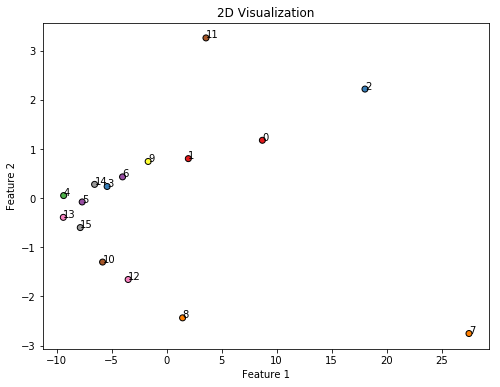

In [23]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X2d = pca.transform(X)
plt.figure(2, figsize=(8, 6))
plt.clf()
for label, name in name_mappings:
    x_text = X2d[y == label, 0].mean()
    y_text = X2d[y == label, 1].mean()
    plt.text(x_text, y_text, label)

plt.scatter(X2d[:, 0], X2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title("2D Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks()
plt.yticks()
plt.show()

## Use T-SNE

效果比较差，数据比较离散，但是聚类不好

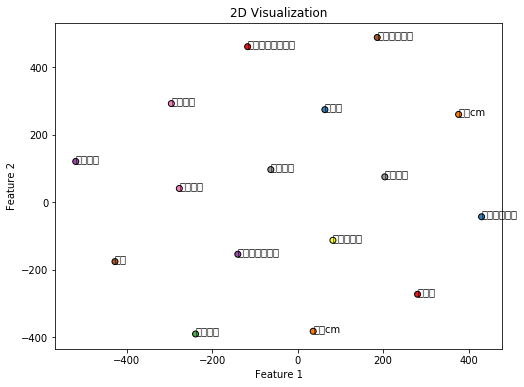

In [24]:
from sklearn.manifold import TSNE

# optional arguments: init='pca', random_state=0
tsne = TSNE(n_components=2)
tsne.fit_transform(X)
X_t2d = tsne.embedding_
plt.figure(3, figsize=(8, 6))
plt.clf()
for label, name in name_mappings:
    x_text = X_t2d[y == label, 0].mean()
    y_text = X_t2d[y == label, 1].mean()
    plt.text(x_text, y_text, name)

plt.scatter(X_t2d[:, 0], X_t2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title("2D Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks()
plt.yticks()
plt.show()